In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import math
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

In [ ]:
df1 = pd.read_csv('csv/gather1_core.csv')
df2 = pd.read_csv('csv/gather2_core.csv')
df3 = pd.read_csv('csv/gather3_core.csv')
df1_socket = pd.read_csv('csv/gather1_socket.csv')
df2_socket = pd.read_csv('csv/gather2_socket.csv')
df3_socket = pd.read_csv('csv/gather3_socket.csv')
df1_node = pd.read_csv('csv/gather1_node.csv')
df2_node = pd.read_csv('csv/gather2_node.csv')
df3_node = pd.read_csv('csv/gather3_node.csv')

In [149]:
def map3d_grid(df_maps, titles, out, colmap='viridis'):
    """
    Crea una griglia 2x2 di plot 3D per quattro diversi set di dati.
    
    Parametri:
        df_maps (list): Lista di quattro DataFrame contenenti i dati da plottare.
        titles (list): Lista di quattro titoli da usare per ciascun plot.
    """
    fig, axs = plt.subplots(1, 3, figsize=(20, 15), dpi=200, subplot_kw={'projection': '3d'})
    axs = axs.flatten() 

    for i, (df_map, title) in enumerate(zip(df_maps, titles)):
        ax = axs[i]
        df_map = df_map[df_map['Processes'].isin([2**i for i in range(1, 9)])]
        # Log transform of 'Processes' and 'Size'
        x = np.log2(df_map['Processes'])
        
        y = np.log2(df_map['Size'])
        z = np.log2(df_map['Latency'])
        
        # Data preparation for interpolating the plane with logarithmic variables
        xi = np.linspace(x.min(), x.max(), 50)
        yi = np.linspace(y.min(), y.max(), 50)
        xi, yi = np.meshgrid(xi, yi)

        ax.plot_trisurf(x, y, z, cmap=colmap, edgecolor='black', alpha=0.8)
        
        ax.set_xlim(ax.get_xlim()[::-1])
        
        process_ticks = np.arange(x.min(), x.max() + 1, 1)
        size_ticks = np.arange(0, 21, 3)
        
        ax.set_xticks(process_ticks)
        ax.set_xticklabels([f"$2^{{{int(tick)}}}$" for tick in process_ticks])
        ax.set_yticks(size_ticks)
        ax.set_yticklabels([f"$2^{{{int(tick)}}}$" for tick in size_ticks])
        
        ax.view_init(elev=20, azim=320)
        
        ax.set_xlabel('Number of Processes', fontsize=7)
        ax.set_ylabel('Message Size (bytes)')
        
        mappable = cm.ScalarMappable(cmap=colmap, norm=plt.Normalize(vmin=z.min(), vmax=z.max()))
        mappable.set_array(z)
        fig.colorbar(mappable, ax=ax, label='$\\log_2$(Avg Latency $(\\mu s)$)', shrink=0.6, pad=0.15)
        
        ax.set_title(title)
        
    plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.2, hspace=0.2)
    #plt.savefig(f'{out_dir}/{out}')
    plt.show()

In [150]:
broadcast = [df1, df1_socket, df1_node]
titles = ['Basic linear-core', 'Basic linear-socket', 'Basic linear-node']

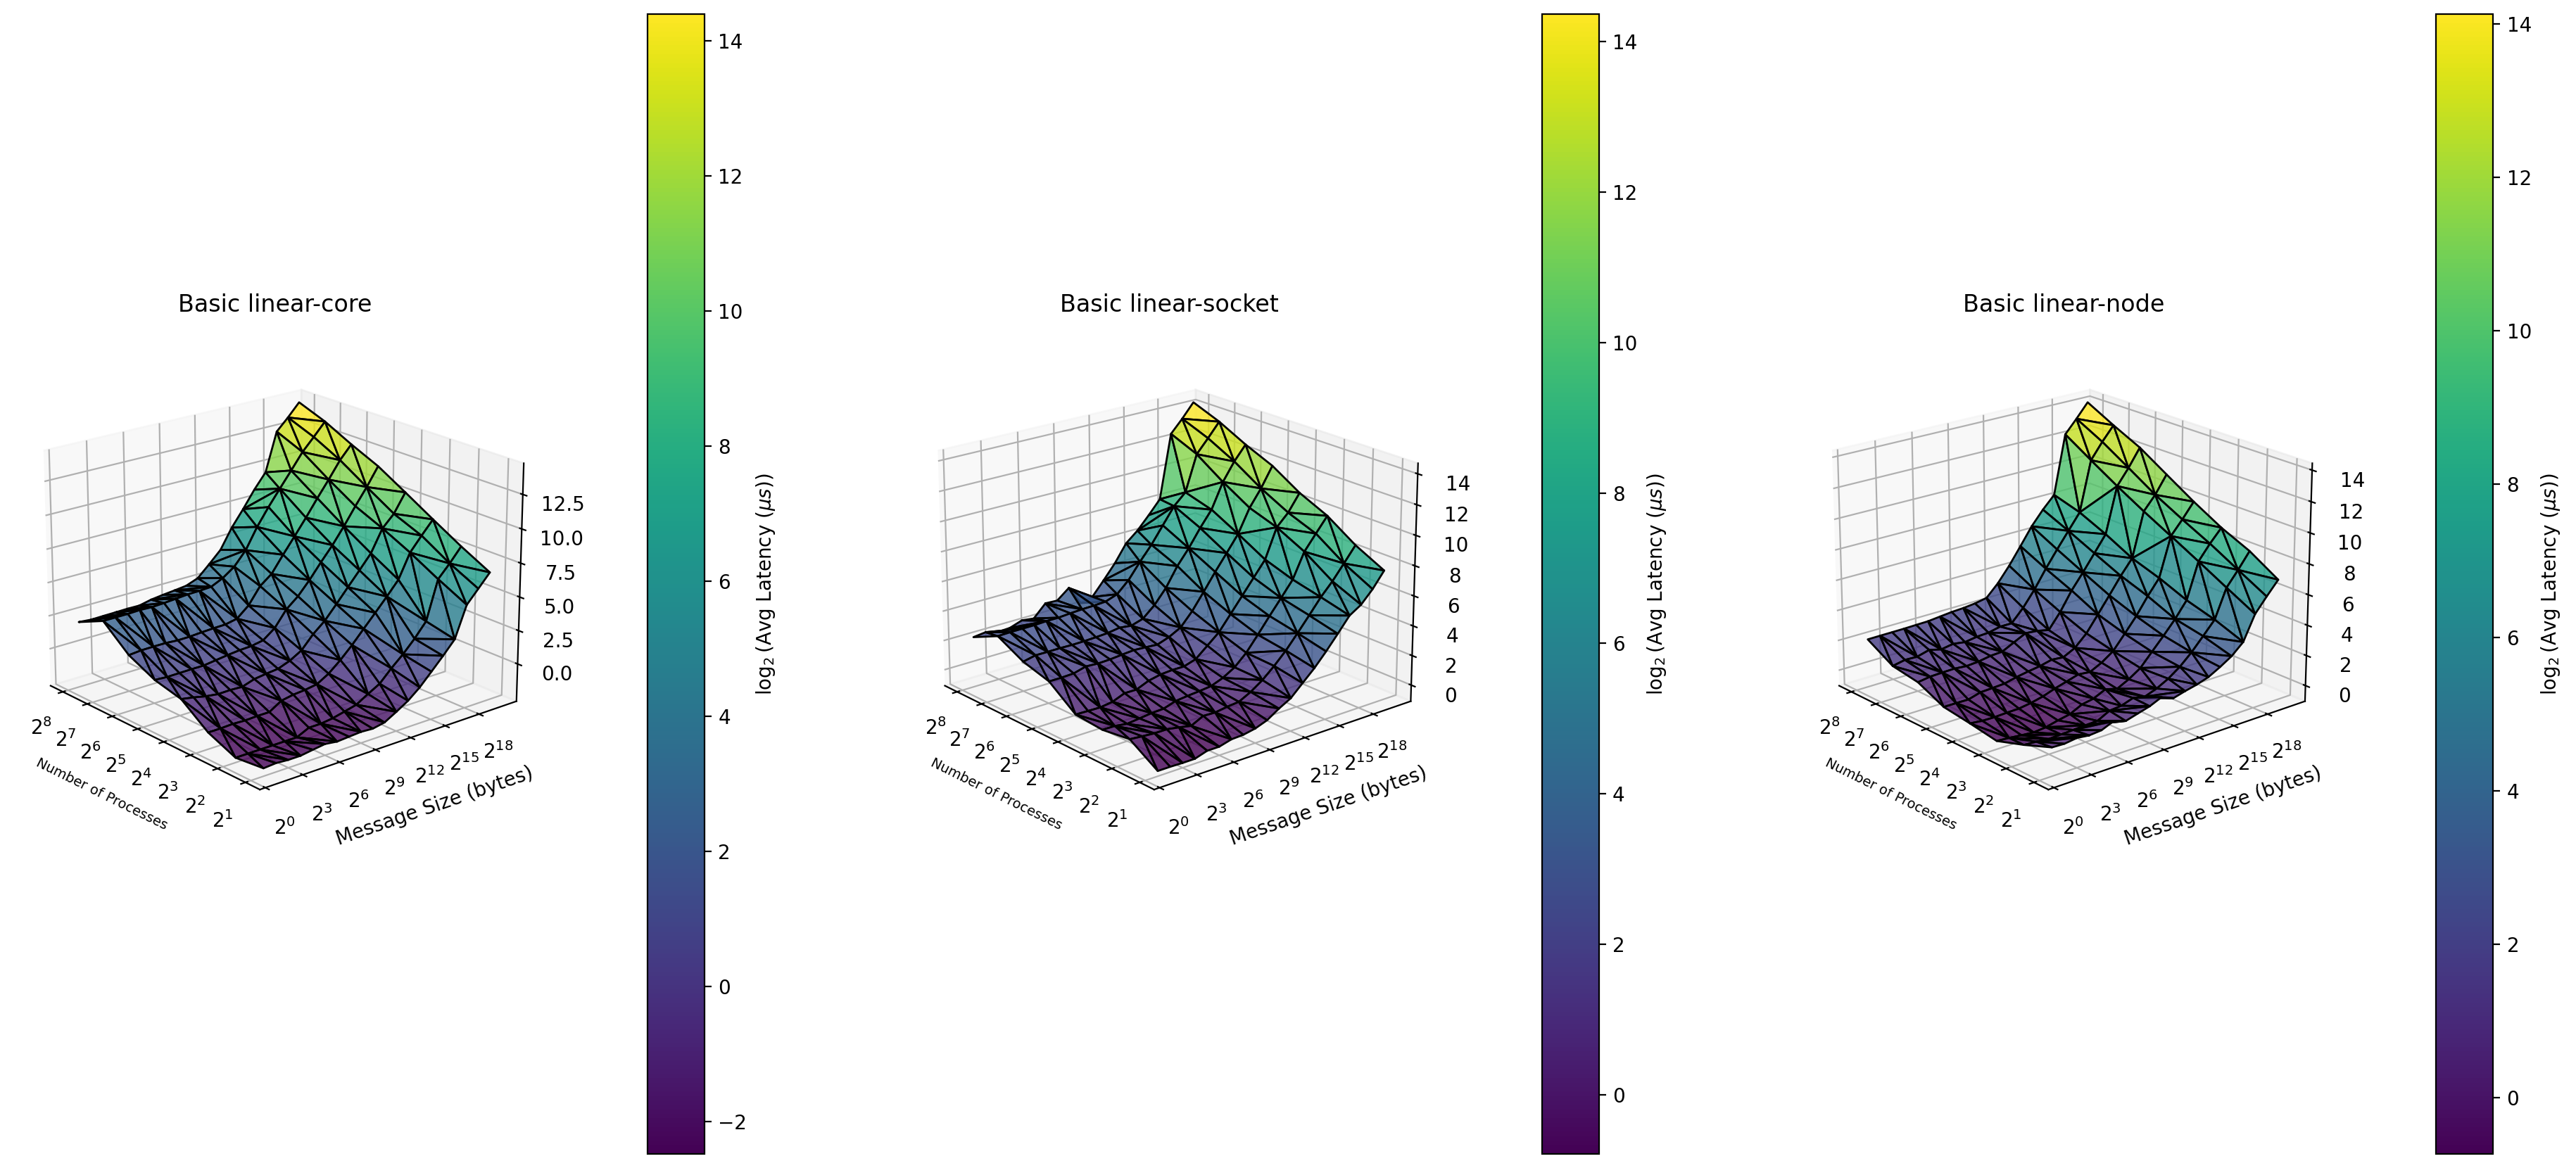

In [151]:
map3d_grid(broadcast,titles,'broadcast.png', 'viridis')

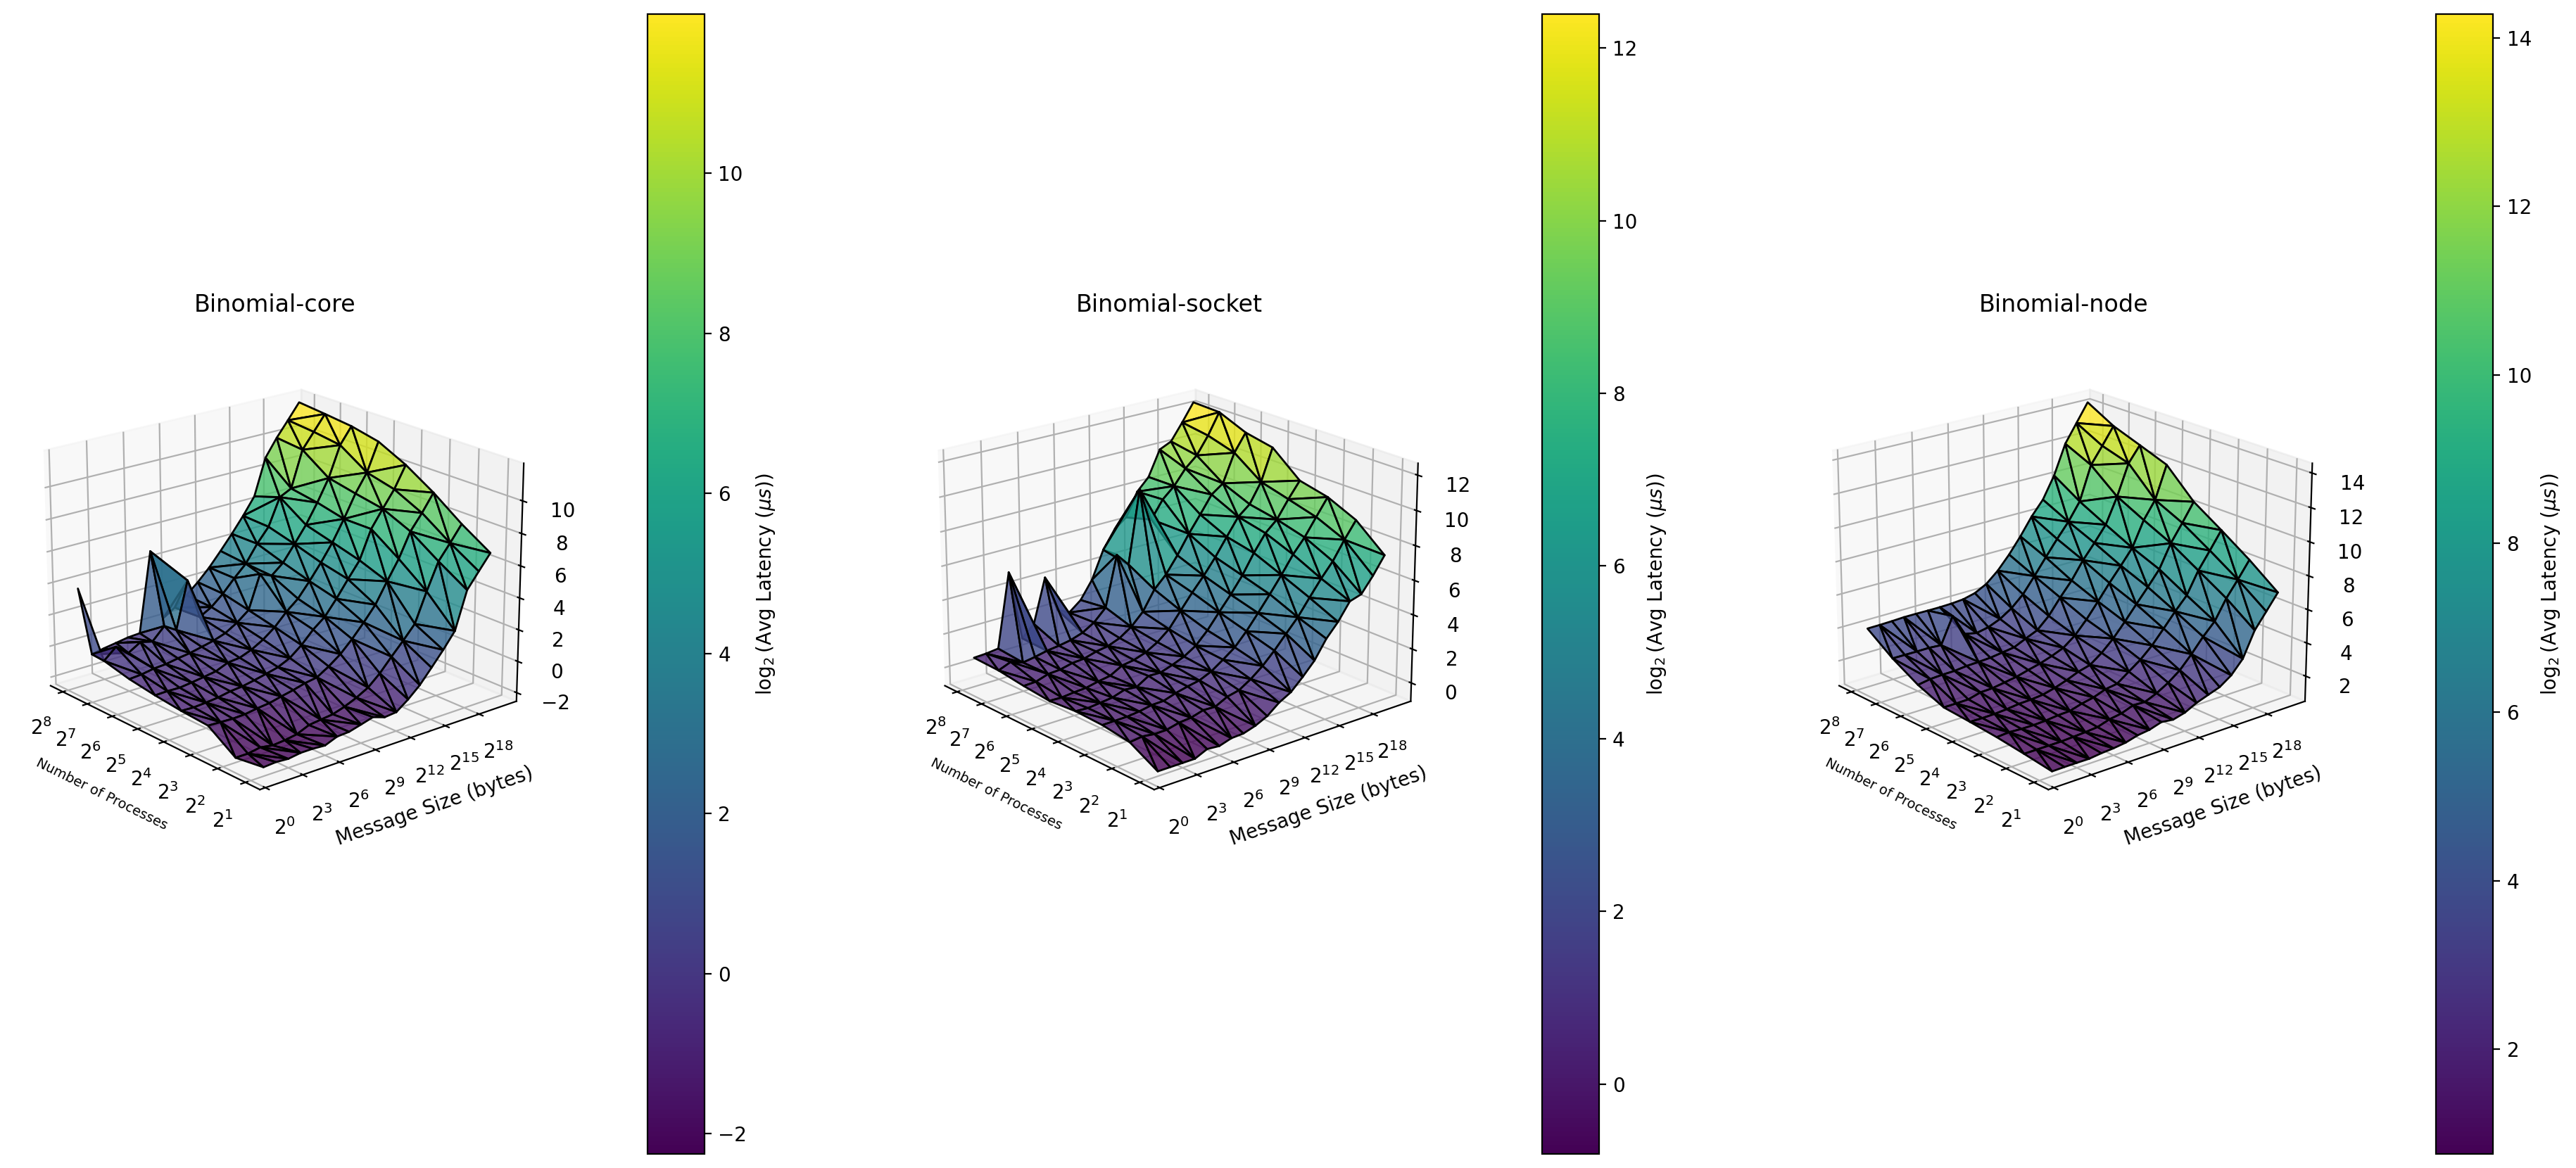

In [152]:
broadcast = [df2, df2_socket, df2_node]
titles = ['Binomial-core', 'Binomial-socket', 'Binomial-node']
map3d_grid(broadcast,titles,'broadcast.png', 'viridis')

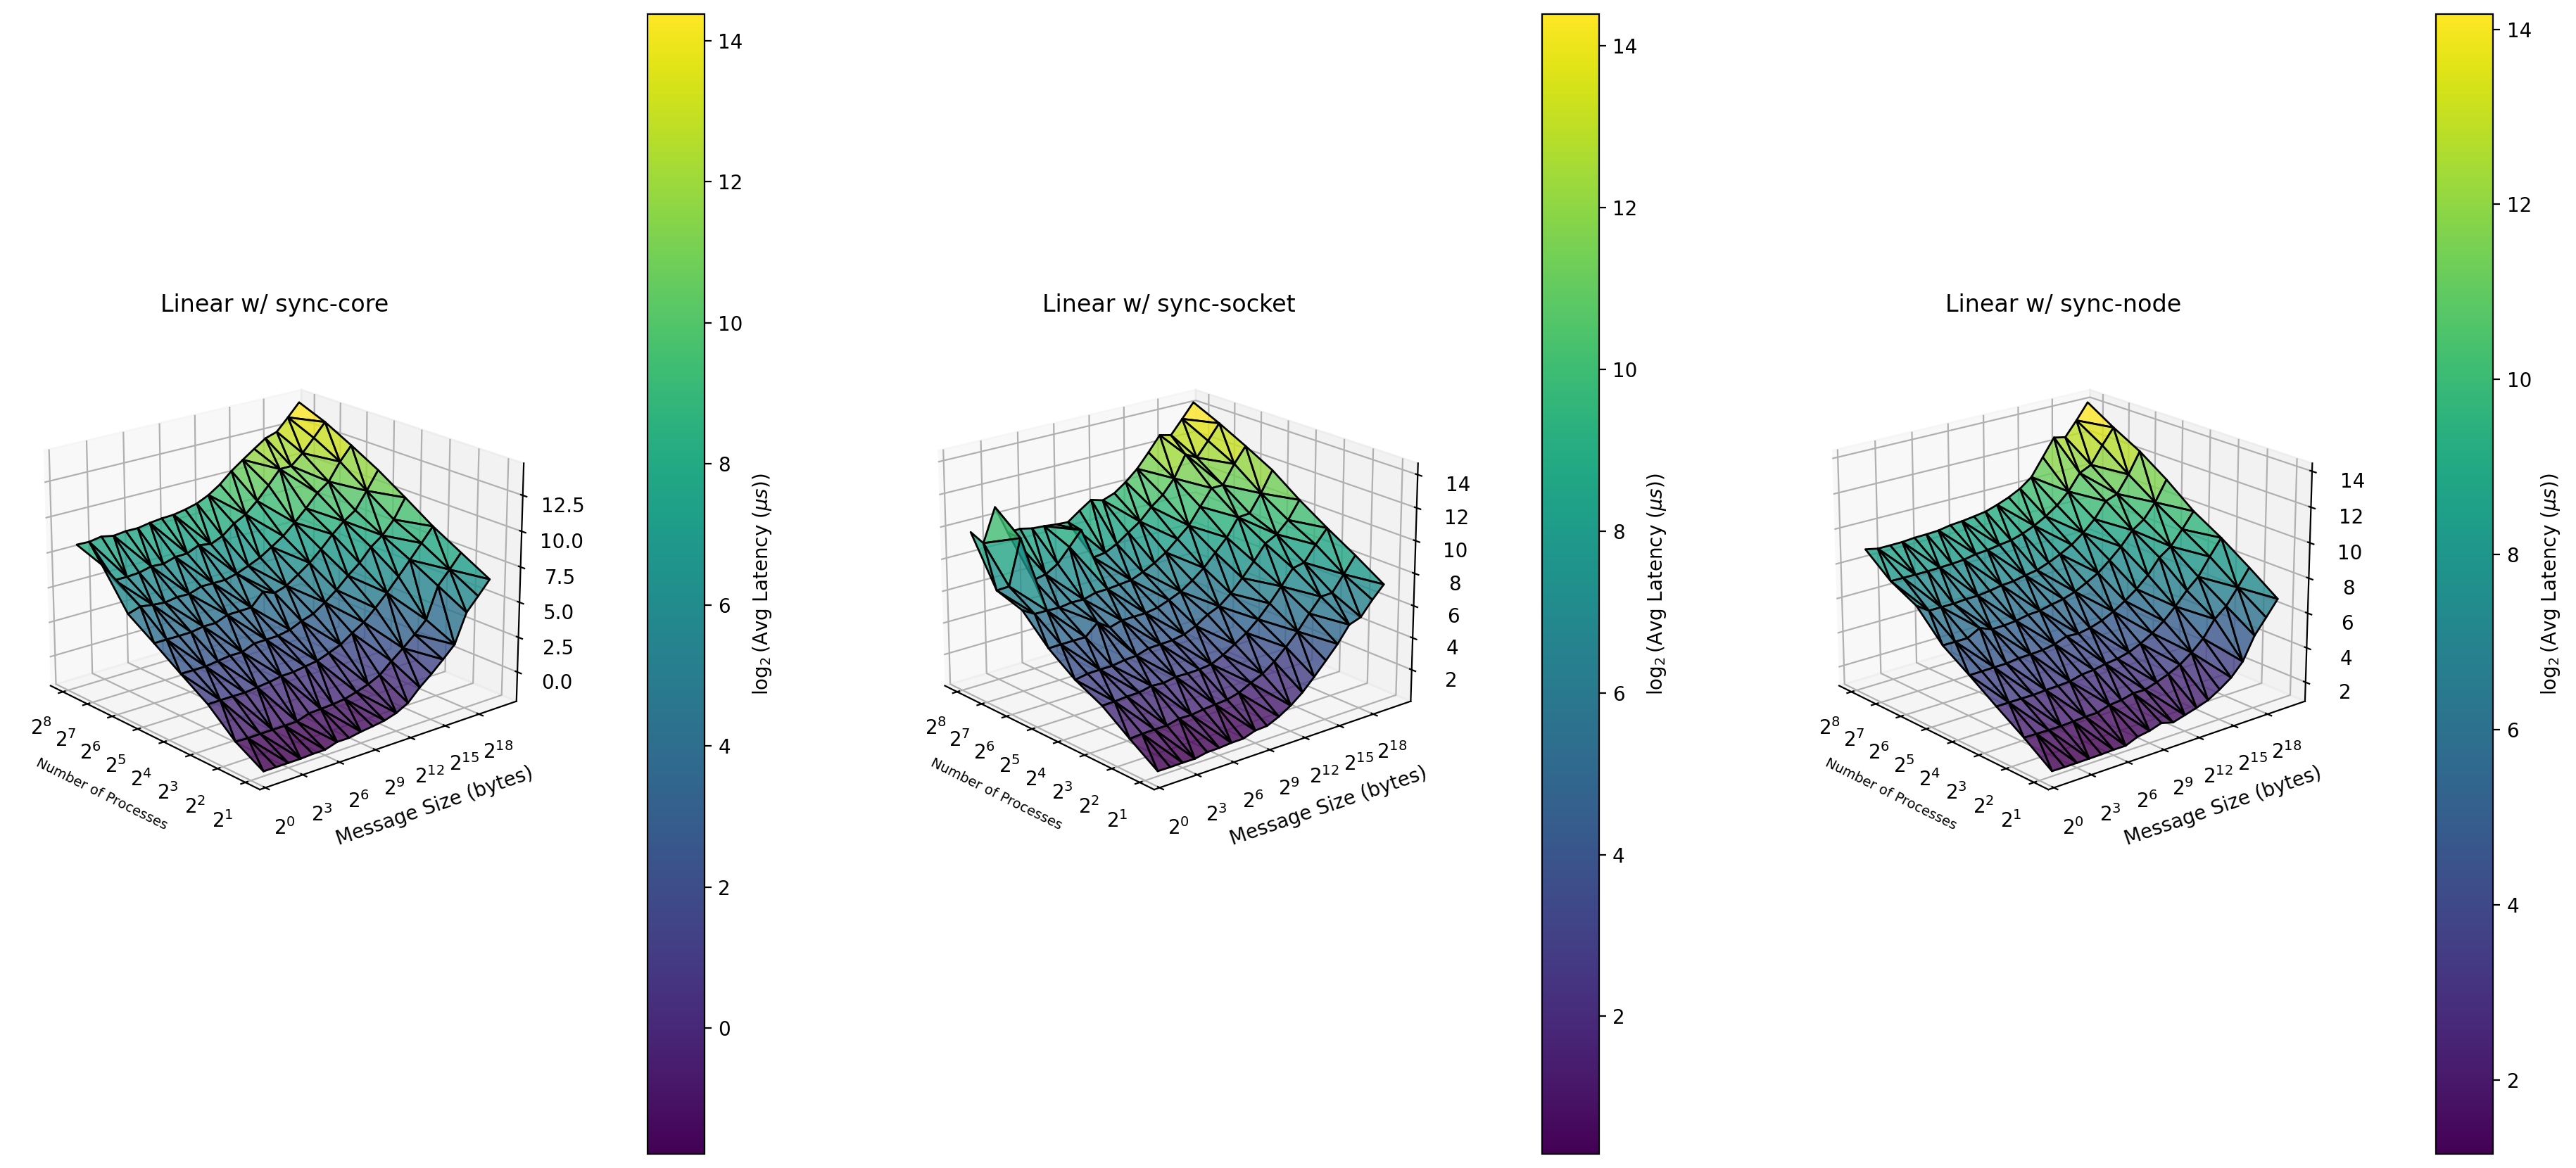

In [153]:
broadcast = [df3, df3_socket, df3_node]
titles = ['Linear w/ sync-core', 'Linear w/ sync-socket', 'Linear w/ sync-node']
map3d_grid(broadcast,titles,'broadcast.png', 'viridis')